In [140]:
import numpy as np
from scipy.fft import fft2, ifft2
import cv2 as cv
import matplotlib.pyplot as plt

In [141]:
def f_gaussiano(h, w, k_size, sigma):
    '''
        Esta funcion genera un filtro gaussiano para una imagen de h y w,
        y un kzise y sigma deseado.
    '''
    kernel_gauss = cv.getGaussianKernel(ksize=k_size, sigma=sigma)
    kernel_gauss = kernel_gauss * kernel_gauss.T
    pad_x = (w - k_size) // 2
    pad_y = (h - k_size) // 2

    kernel_gauss = np.pad(kernel_gauss, ((0, 0), (pad_x, pad_x)), mode='constant', constant_values=0)
    if (w - k_size) % 2 == 1:
        kernel_gauss = np.pad(kernel_gauss, ((0, 0), (0, 1)), mode='constant', constant_values=0)
    kernel_gauss = np.pad(kernel_gauss, ((pad_y, pad_y), (0, 0)), mode='constant', constant_values=0)
    # Si el tamaño en y es impar, agregar un cero adicional en el borde inferior
    if (h - k_size) % 2 == 1:
        kernel_gauss = np.pad(kernel_gauss, ((0, 1), (0, 0)), mode='constant', constant_values=0)
    gauss_filter_fourier = np.fft.fft2(kernel_gauss)
    return kernel_gauss, gauss_filter_fourier


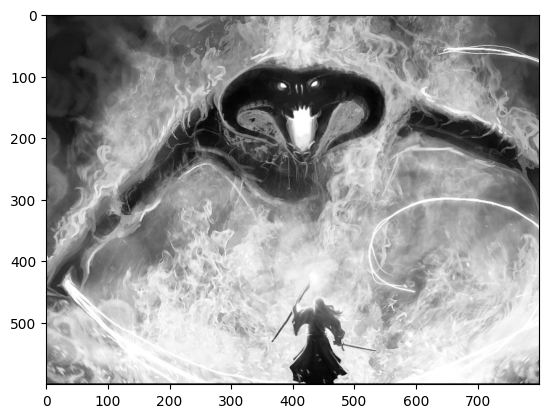

In [142]:
img = cv.imread(r'C:\Users\santi\IA\3 Bimestre\vision_computadora_I\Material_TPs\TP2\gandalf_800x600.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

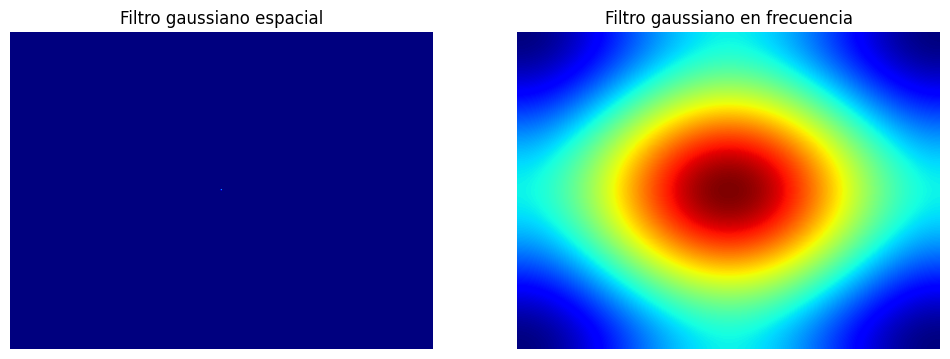

In [143]:
# Obtener el filtro gaussiano en el dominio espacial y de frecuencia
kernel, kernel_tf = f_gaussiano(img.shape[0], img.shape[1], 3, sigma=0.5)

# Graficar el filtro gaussiano en el dominio espacial
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title("Filtro gaussiano espacial")
plt.imshow(kernel, cmap='jet')

# Graficar el filtro gaussiano en el dominio de la frecuencia
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("Filtro gaussiano en frecuencia")
tf_shifted = np.fft.fftshift(kernel_tf)
plt.imshow(np.abs(tf_shifted), cmap='jet')

# Mostrar las gráficas
plt.show()

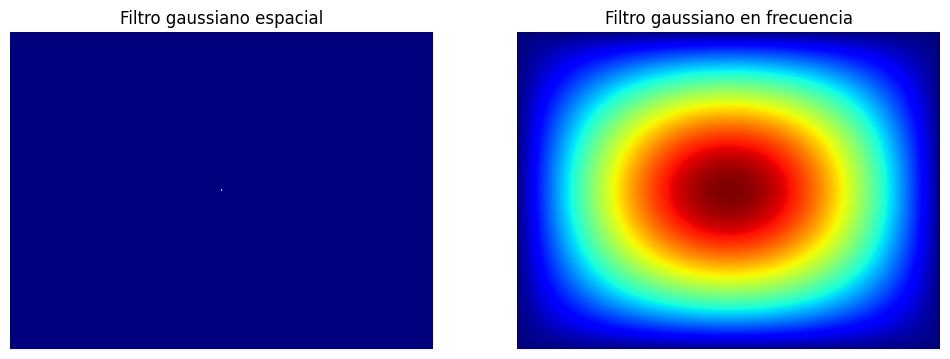

In [144]:
# Obtener el filtro gaussiano en el dominio espacial y de frecuencia
kernel, kernel_tf = f_gaussiano(img.shape[0], img.shape[1], 50, sigma=0.5)

# Graficar el filtro gaussiano en el dominio espacial
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title("Filtro gaussiano espacial")
plt.imshow(kernel, cmap='jet')

# Graficar el filtro gaussiano en el dominio de la frecuencia
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("Filtro gaussiano en frecuencia")
tf_shifted = np.fft.fftshift(kernel_tf)
plt.imshow(np.abs(tf_shifted), cmap='jet')

# Mostrar las gráficas
plt.show()

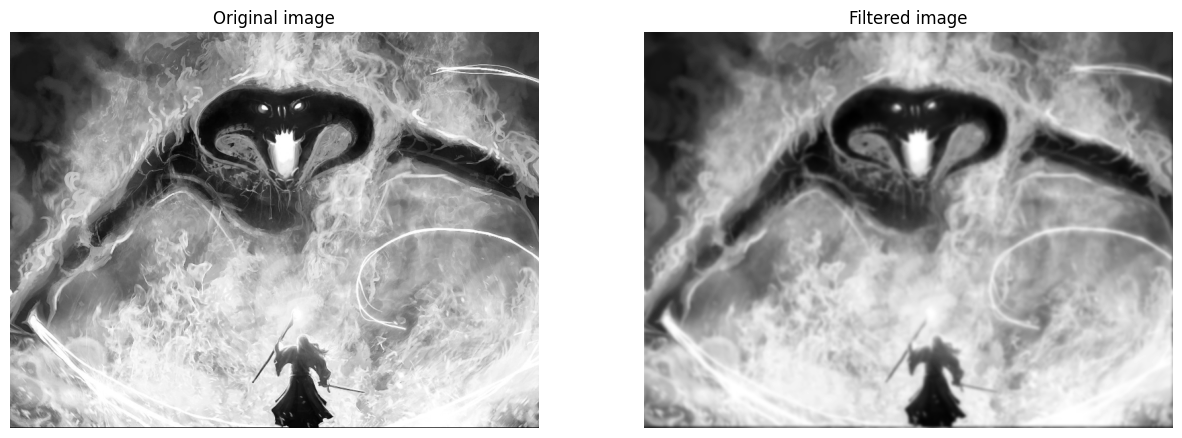

In [145]:
kernel, kernel_tf  = f_gaussiano(img.shape[0],img.shape[1], 401, sigma=2)
img_fft = np.fft.fft2(img)
filtered = img_fft * kernel_tf

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Original image")
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("Filtered image")
plt.imshow(img_gauss, cmap='gray')

In [146]:
def sharpness_metric(image):
    """
        Siguiendo los pasos del paper "Image_Sharpness_Measure_for_Blurred_Images_in_Frequency"
        logramos una metrica de la calidad de una imagen borrosa.
    """
    # Primero se hace la transformada de fourier
    fft_image = np.fft.fft2(image)
    # Desplazamos su origen
    fft_image_shifted = np.fft.fftshift(fft_image)
    
    # Calcular el valor absoluto
    magnitude_spectrum = np.abs(fft_image_shifted)

    #Calculamos el valor maximo de frecuencia
    max_freq = np.max(magnitude_spectrum)
    
    # Calculamos el limite como:
    limit = max_freq / 1000

    # calculamos th que es la cantidad de pixeles que superaron el limite
    TH = np.sum(magnitude_spectrum > limit)

    # calculamos la medida de la calidad que tendra en cta la cantidad
    # de pixeles que superaron el limite sobre el total de pixeles.
    m, n = image.shape
    sharpness = TH / (m * n)
    
    return sharpness



In [147]:
def filtro_g_espacial(imagen, kernel_gauss):
    img_filtr_espacial = cv.filter2D(imagen, -1, kernel_gauss)
    return img_filtr_espacial

def filtro_g_fourier(imagen, kernel_g_fourier):
    imagen_fq = np.fft.fft2(imagen)
    img_filtrada_fft = img_fft * kernel_g_fourier
    img_filtr_freq = np.fft.ifftshift(np.real(np.fft.ifft2(img_filtrada_fft)))
    return img_filtr_freq

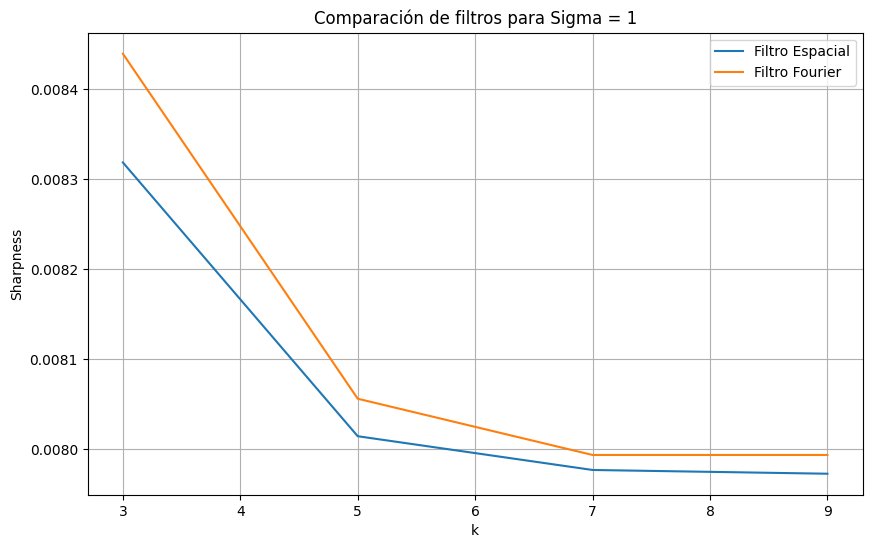

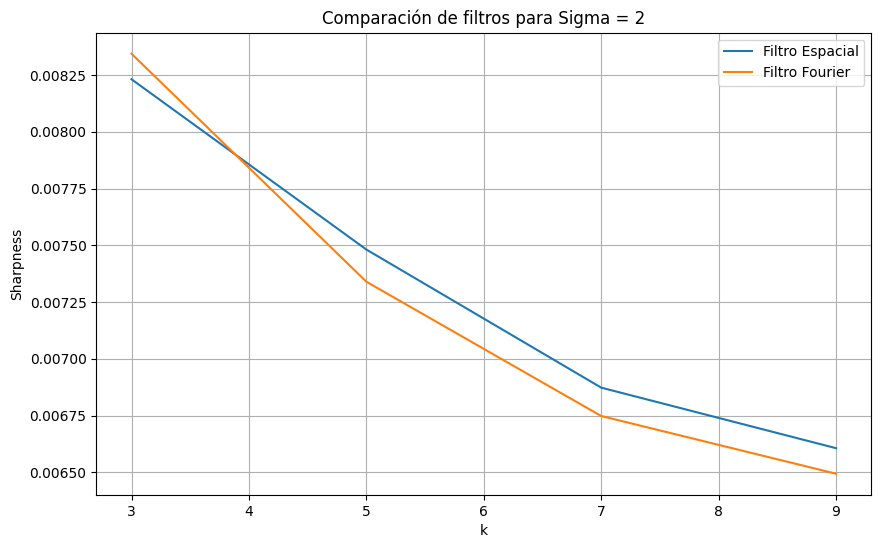

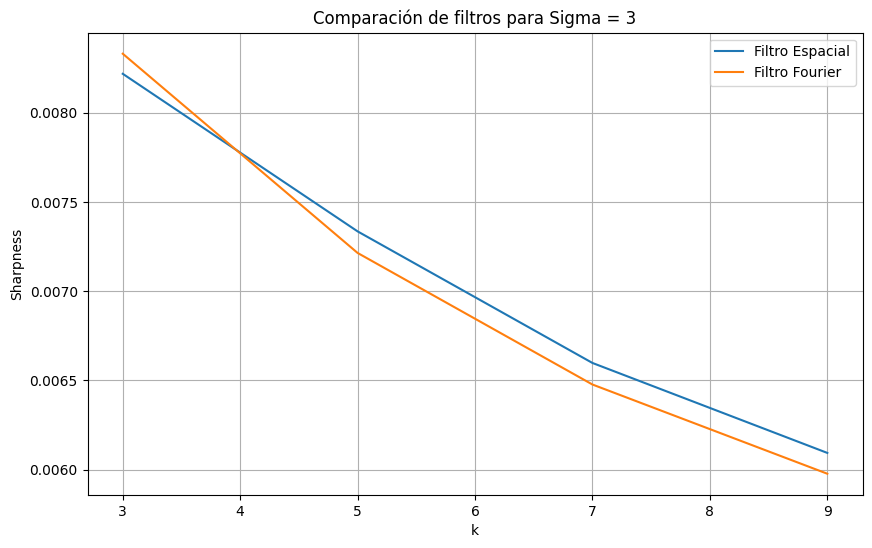

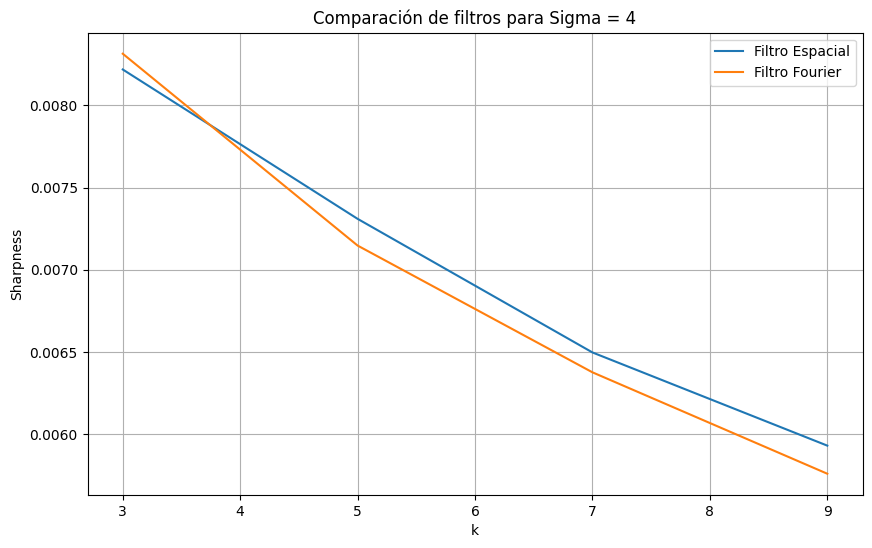

In [148]:
sigmas = [1, 2, 3, 4]
k_values = [3, 5, 7, 9]

def generar_tablas_con_graficas():
    for sigma in sigmas:
        plt.figure(figsize=(10, 6))
        plt.title(f"Comparación de filtros para Sigma = {sigma}")
        plt.xlabel("k")
        plt.ylabel("Sharpness")

        sharpness_values_espacial = []
        sharpness_values_fourier = []

        for k in k_values:
            kernel_gauss, kernel_gauss_fourier = f_gaussiano(img.shape[0], img.shape[1], k, sigma)
            img_filtrada_espacial = filtro_g_espacial(img, kernel_gauss)
            img_filtrada_fourier = filtro_g_fourier(img, kernel_gauss_fourier)
            
            sharpness_espacial = sharpness_metric(img_filtrada_espacial)
            sharpness_fourier = sharpness_metric(img_filtrada_fourier)
            
            sharpness_values_espacial.append(sharpness_espacial)
            sharpness_values_fourier.append(sharpness_fourier)

        plt.plot(k_values, sharpness_values_espacial, label="Filtro Espacial")
        plt.plot(k_values, sharpness_values_fourier, label="Filtro Fourier")

        plt.legend()
        plt.grid(True)
        plt.show()

# Llamar a la función para generar las tablas con gráficas y el valor de sigma
generar_tablas_con_graficas()

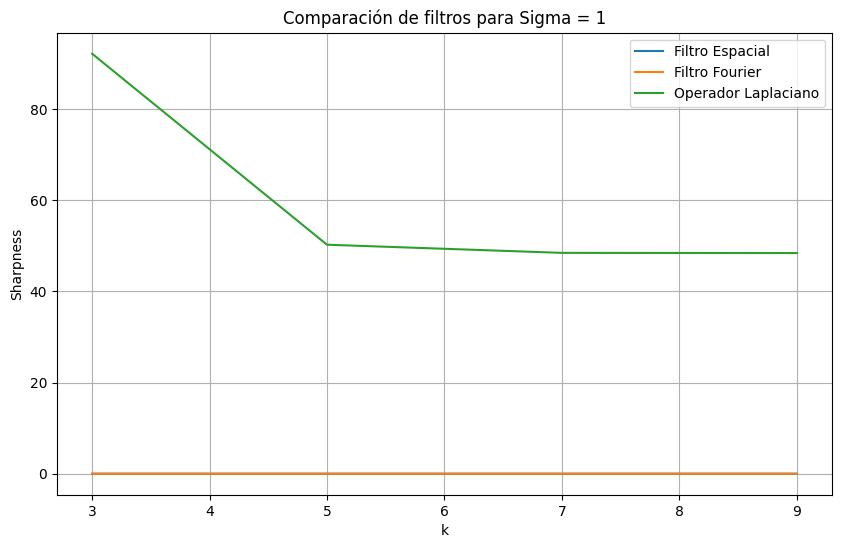

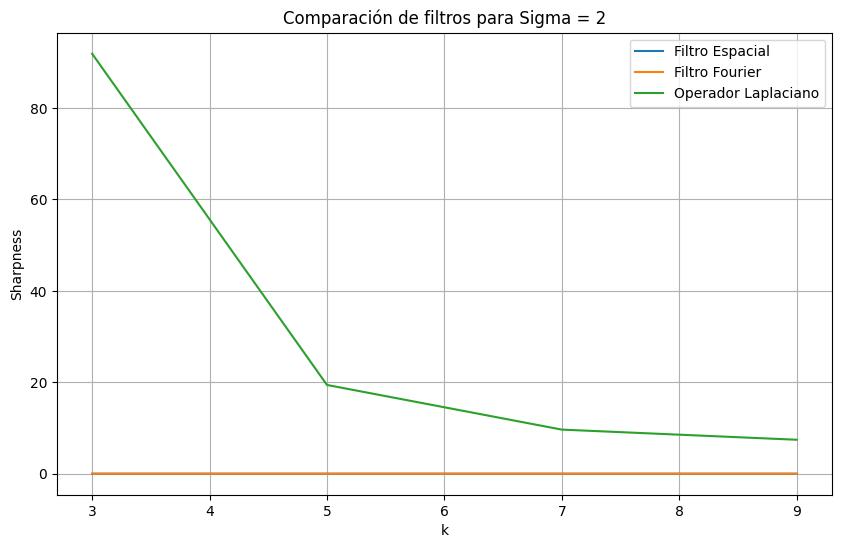

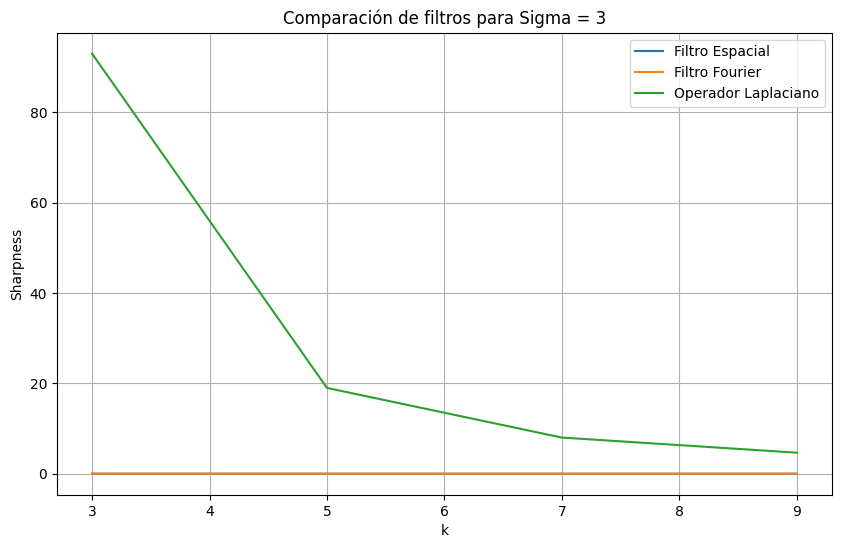

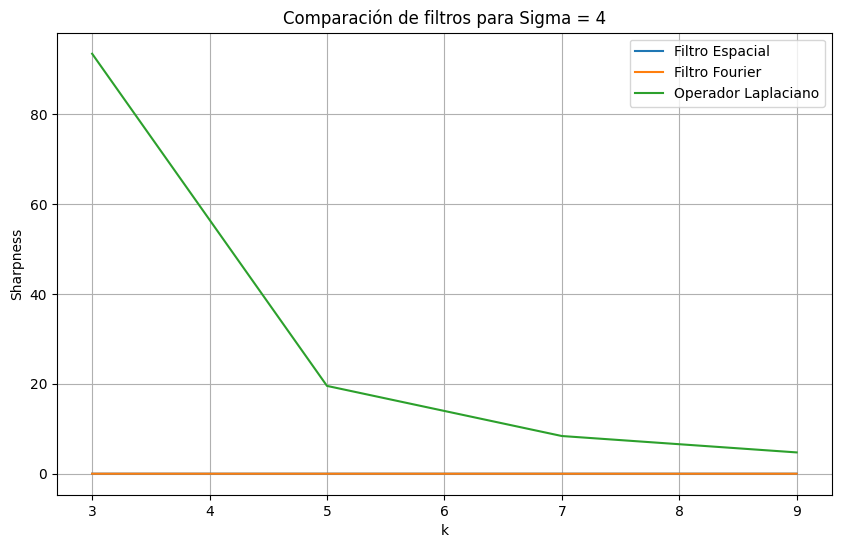

In [152]:
# Usaremos el metodo laplaciano
sigmas = [1, 2, 3, 4]
k_values = [3, 5, 7, 9]

def laplacian_gradient(image):
    laplacian = cv.Laplacian(image, cv.CV_64F)
    sharpness = np.var(laplacian)
    return sharpness

# Definir una función para generar las tablas con gráficas y el valor de sigma
def generar_tablas_con_graficas():
    for sigma in sigmas:
        # Tabla: Sigma fijo, varía el valor de k
        plt.figure(figsize=(10, 6))
        plt.title(f"Comparación de filtros para Sigma = {sigma}")
        plt.xlabel("k")
        plt.ylabel("Sharpness")

        sharpness_values_espacial = []
        sharpness_values_fourier = []
        sharpness_values_laplacian = []  # Nueva medida usando el operador de gradiente de Laplaciano

        for k in k_values:
            kernel_gauss, kernel_gauss_fourier = f_gaussiano(img.shape[0], img.shape[1], k, sigma)
            img_filtrada_espacial = filtro_g_espacial(img, kernel_gauss)
            img_filtrada_fourier = filtro_g_fourier(img, kernel_gauss_fourier)
            
            sharpness_espacial = sharpness_metric(img_filtrada_espacial)
            sharpness_fourier = sharpness_metric(img_filtrada_fourier)
            sharpness_laplacian = laplacian_gradient(img_filtrada_espacial)  # Nueva medida
            
            sharpness_values_espacial.append(sharpness_espacial)
            sharpness_values_fourier.append(sharpness_fourier)
            sharpness_values_laplacian.append(sharpness_laplacian)  # Agregar valor a la lista

        plt.plot(k_values, sharpness_values_espacial, label="Filtro Espacial")
        plt.plot(k_values, sharpness_values_fourier, label="Filtro Fourier")
        plt.plot(k_values, sharpness_values_laplacian, label="Operador Laplaciano")  # Agregar curva

        plt.legend()
        plt.grid(True)
        plt.show()

# Llamar a la función para generar las tablas con gráficas y el valor de sigma
generar_tablas_con_graficas()
